In [ ]:
# Step 1 Install Boost library (1.77.0)
# Approximately 20 minutes

!wget -O boost_1_77_0.tar.gz https://sourceforge.net/projects/boost/files/boost/1.77.0/boost_1_77_0.tar.gz/download

# Extract the downloaded archive
!tar -xvzf boost_1_77_0.tar.gz

# Move to the Boost directory
%cd boost_1_77_0

# Run the bootstrap script
!bash ./bootstrap.sh

# Install Boost (change the installation destination to /usr/local)
!./b2 install --prefix=/usr/local --with=all -j$(nproc)

ストリーミング出力は最後の 5000 行に切り捨てられました。
common.copy /usr/local/include/boost/numeric/ublas/detail/duff.hpp
common.copy /usr/local/include/boost/numeric/ublas/detail/documentation.hpp
common.copy /usr/local/include/boost/numeric/ublas/detail/definitions.hpp
common.copy /usr/local/include/boost/numeric/ublas/detail/config.hpp
common.copy /usr/local/include/boost/numeric/ublas/detail/concepts.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/unwrap_reference.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/unit_helper.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/ublas_wrapper.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/stepper_traits.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/state_wrapper.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/split_adaptor.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/split.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/same_size.hpp
common.copy /usr/loca

In [ ]:
%cd /content/boost_1_77_0
!./b2 install --prefix=/content/boost_1_77_0/stage --with=all -j$(nproc)

ストリーミング出力は最後の 5000 行に切り捨てられました。
common.copy /content/boost_1_77_0/stage/include/boost/outcome/experimental/status-code/generic_code.hpp
common.copy /content/boost_1_77_0/stage/include/boost/outcome/experimental/status-code/errored_status_code.hpp
common.copy /content/boost_1_77_0/stage/include/boost/outcome/experimental/status-code/error.hpp
common.copy /content/boost_1_77_0/stage/include/boost/outcome/experimental/status-code/config.hpp
common.copy /content/boost_1_77_0/stage/include/boost/outcome/experimental/status-code/com_code.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeric/ublas/traits/iterator_type.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeric/ublas/traits/const_iterator_type.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeric/ublas/traits/c_array.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeric/ublas/tensor/tensor.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeric/ublas/tensor/strides.hpp
common

In [ ]:
!find /content/boost_1_77_0/stage/lib -type f

/content/boost_1_77_0/stage/lib/libboost_chrono.so.1.77.0
/content/boost_1_77_0/stage/lib/libboost_numpy311.so.1.77.0
/content/boost_1_77_0/stage/lib/libboost_math_tr1l.a
/content/boost_1_77_0/stage/lib/libboost_json.so.1.77.0
/content/boost_1_77_0/stage/lib/libboost_timer.a
/content/boost_1_77_0/stage/lib/libboost_test_exec_monitor.a
/content/boost_1_77_0/stage/lib/libboost_stacktrace_noop.so.1.77.0
/content/boost_1_77_0/stage/lib/libboost_coroutine.so.1.77.0
/content/boost_1_77_0/stage/lib/libboost_log.a
/content/boost_1_77_0/stage/lib/libboost_math_c99.a
/content/boost_1_77_0/stage/lib/libboost_atomic.a
/content/boost_1_77_0/stage/lib/libboost_unit_test_framework.a
/content/boost_1_77_0/stage/lib/libboost_python311.a
/content/boost_1_77_0/stage/lib/libboost_type_erasure.a
/content/boost_1_77_0/stage/lib/libboost_iostreams.so.1.77.0
/content/boost_1_77_0/stage/lib/libboost_math_c99l.so.1.77.0
/content/boost_1_77_0/stage/lib/libboost_contract.so.1.77.0
/content/boost_1_77_0/stage/lib/

In [ ]:
# Step 2: Clone Vina-GPU-CUDA repository
%cd /content
!git clone https://github.com/Glinttsd/Vina-GPU-CUDA.git

/content
Cloning into 'Vina-GPU-CUDA'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 297 (delta 17), reused 19 (delta 9), pack-reused 257 (from 1)
Receiving objects: 100% (297/297), 69.26 MiB | 22.66 MiB/s, done.
Resolving deltas: 100% (114/114), done.
Updating files: 100% (264/264), done.


In [ ]:
# Step 3: Navigate to the Vina-GPU-CUDA directory
%cd /content/Vina-GPU-CUDA

/content/Vina-GPU-CUDA


In [ ]:
# Step 4: Set up Makefile
# Update the Makefile paths for BOOST_LIB_PATH and NVCC_COMPILER (example paths shown, adjust as necessary)
!sed -i 's|BOOST_LIB_PATH=.*|BOOST_LIB_PATH=/content/boost_1_77_0|' Makefile
!sed -i 's|NVCC_COMPILER=.*|NVCC_COMPILER=/usr/local/cuda-12/bin/nvcc|' Makefile

In [ ]:
# Step 5: Compile the binary
!make clean
!make cuda

rm Vina-GPU
rm: cannot remove 'Vina-GPU': No such file or directory
make: *** [Makefile:22: clean] Error 1
/usr/local/cuda-12/bin/nvcc -o Vina-GPU -I/content/boost_1_77_0 -I/content/boost_1_77_0/boost  -I./lib -I./inc/ -I./inc/cuda  ./main/main.cpp -O3 ./lib/*.cpp /content/boost_1_77_0/libs/thread/src/pthread/thread.cpp /content/boost_1_77_0/libs/thread/src/pthread/once.cpp  ./inc/cuda/kernel2.cu -lboost_program_options -lboost_system -lboost_filesystem -lstdc++ -lm -lpthread -L/content/boost_1_77_0/stage/lib -DGRID_DIM1=64 -DGRID_DIM2=128   -DBUILD_KERNEL_FROM_SOURCE
In file included from /content/boost_1_77_0/boost/config/header_deprecated.hpp:18,
                 from /content/boost_1_77_0/boost/progress.hpp:22,
                 from ./lib/monte_carlo.cpp:33:
/content/boost_1_77_0/boost/config/pragma_message.hpp:24:34: note: ‘#pragma message: This header is deprecated. Use the facilities in <boost/timer/timer.hpp> or <boost/timer/progress_display.hpp> instead.’
   24 | # define BOOS

In [ ]:
# Step 6: Install Biopython library
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.8 MB/s eta 0:00:00


In [ ]:
# Step 7: Install Miniconda and fpocket library
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install conda-forge::fpocket --yes

--2025-02-01 07:38:54--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.177.84, 104.18.176.84, 2606:4700::6812:b054, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.177.84|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2025-02-01 07:38:54--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147784736 (141M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 140.94M   134MB/s    in 1.1s    

2025-02-01 07:38:55 (134 MB/s) - ‘Miniconda

In [ ]:
# Step 8: Install the Open Babel software
!apt-get -qq install -y openbabel

Selecting previously unselected package libinchi1.
(Reading database ... 124950 files and directories currently installed.)
Preparing to unpack .../libinchi1_1.03+dfsg-4_amd64.deb ...
Unpacking libinchi1 (1.03+dfsg-4) ...
Selecting previously unselected package libmaeparser1:amd64.
Preparing to unpack .../libmaeparser1_1.2.4-1build1_amd64.deb ...
Unpacking libmaeparser1:amd64 (1.2.4-1build1) ...
Selecting previously unselected package libopenbabel7.
Preparing to unpack .../libopenbabel7_3.1.1+dfsg-6ubuntu5_amd64.deb ...
Unpacking libopenbabel7 (3.1.1+dfsg-6ubuntu5) ...
Selecting previously unselected package openbabel.
Preparing to unpack .../openbabel_3.1.1+dfsg-6ubuntu5_amd64.deb ...
Unpacking openbabel (3.1.1+dfsg-6ubuntu5) ...
Setting up libmaeparser1:amd64 (1.2.4-1build1) ...
Setting up libinchi1 (1.03+dfsg-4) ...
Setting up libopenbabel7 (3.1.1+dfsg-6ubuntu5) ...
Setting up openbabel (3.1.1+dfsg-6ubuntu5) ...
Processing triggers for libc-bin (2.35-0ubuntu3.8) ...
/sbin/ldconfig.r

In [ ]:
# Step 9: Download AlphaFold data for the selected species

import ipywidgets as widgets
from IPython.display import display
import requests
from tqdm.notebook import tqdm

# Download function
def download_tar_file(url, destination_folder='/content'):
    file_name = url.split('/')[-1]
    destination_path = f"{destination_folder}/{file_name}"

    response = requests.get(url, stream=True)
    if response.status_code != 200:
        print(f"Failed to download file {file_name}.")
        return

    total_size_in_bytes = int(response.headers.get('content-length', 0))
    block_size = 1024
    progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)

    with open(destination_path, 'wb') as file:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()

    if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
        print("An error occurred.")
    else:
        print(f"Download of {file_name} completed. Saved to: {destination_path}")

# Dictionary of species names and corresponding URLs
download_urls = {
    'Arabidopsis': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000006548_3702_ARATH_v4.tar',
    'Nematode worm': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000001940_6239_CAEEL_v4.tar',
    'C. albicans': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000559_237561_CANAL_v4.tar',
    'Zebrafish': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000437_7955_DANRE_v4.tar',
    'Dictyostelium': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002195_44689_DICDI_v4.tar',
    'Fruit fly': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000803_7227_DROME_v4.tar',
    'E. coli': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000625_83333_ECOLI_v4.tar',
    'Soybean': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000008827_3847_SOYBN_v4.tar',
    'Human': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000005640_9606_HUMAN_v4.tar',
    'M. jannaschii': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000805_243232_METJA_v4.tar',
    'Mouse': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000589_10090_MOUSE_v4.tar',
    'Asian rice': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000059680_39947_ORYSJ_v4.tar',
    'Rat': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002494_10116_RAT_v4.tar',
    'Budding yeast': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002311_559292_YEAST_v4.tar',
    'Fission yeast': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002485_284812_SCHPO_v4.tar',
    'Maize': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000007305_4577_MAIZE_v4.tar',
    'Ajellomyces capsulatus': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000001631_447093_AJECG_v4.tar',
    'Brugia malayi': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000006672_6279_BRUMA_v4.tar',
    'C. jejuni': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000799_192222_CAMJE_v4.tar',
    'Cladophialophora carrionii': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000094526_86049_9EURO1_v4.tar',
    'Dracunculus medinensis': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000274756_318479_DRAME_v4.tar',
    'Enterococcus faecium': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000325664_1352_ENTFC_v4.tar',
    'Fonsecaea pedrosoi': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000053029_1442368_9EURO2_v4.tar',
    'H. influenzae': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000579_71421_HAEIN_v4.tar',
    'H. pylori': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000429_85962_HELPY_v4.tar',
    'K. pneumoniae': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000007841_1125630_KLEPH_v4.tar',
    'L. infantum': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000008153_5671_LEIIN_v4.tar',
    'Madurella mycetomatis': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000078237_100816_9PEZI1_v4.tar',
    'Mycobacterium leprae': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000806_272631_MYCLE_v4.tar',
    'M. tuberculosis': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000001584_83332_MYCTU_v4.tar',
    'Mycobacterium ulcerans': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000020681_1299332_MYCUL_v4.tar',
    'N. gonorrhoeae': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000535_242231_NEIG1_v4.tar',
    'Nocardia brasiliensis': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000006304_1133849_9NOCA1_v4.tar',
    'Onchocerca volvulus': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000024404_6282_ONCVO_v4.tar',
    'Paracoccidioides lutzii': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002059_502779_PARBA_v4.tar',
    'P. falciparum': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000001450_36329_PLAF7_v4.tar',
    'P. aeruginosa': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002438_208964_PSEAE_v4.tar',
    'S. typhimurium': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000001014_99287_SALTY_v4.tar',
    'Schistosoma mansoni': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000008854_6183_SCHMA_v4.tar',
    'S. dysenteriae': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002716_300267_SHIDS_v4.tar',
    'Sporothrix schenckii': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000018087_1391915_SPOS1_v4.tar',
    'S. aureus': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000008816_93061_STAA8_v4.tar',
    'S. pneumoniae': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000586_171101_STRR6_v4.tar',
    'Strongyloides stercoralis': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000035681_6248_STRER_v4.tar',
    'Trichuris trichiura': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000030665_36087_TRITR_v4.tar',
    'Trypanosoma brucei': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000008524_185431_TRYB2_v4.tar',
    'T. cruzi': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002296_353153_TRYCC_v4.tar',
    'Wuchereria bancrofti': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000270924_6293_WUCBA_v4.tar',
}

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=download_urls.keys(),
    description='species:',
    disabled=False,
)

# Download button and its event handler
button = widgets.Button(description="Download")

def on_button_clicked(b):
    species = dropdown.value
    url = download_urls[species]
    print(f"Downloading data for {species}...")
    download_tar_file(url)

button.on_click(on_button_clicked)

# Display the widgets
display(dropdown, button)

Dropdown(description='species:', options=('Arabidopsis', 'Nematode worm', 'C. albicans', 'Zebrafish', 'Dictyos…

Button(description='Download', style=ButtonStyle())

  0%|          | 0.00/182M [00:00<?, ?iB/s]

Download of UP000000805_243232_METJA_v4.tar completed. Saved to: /content/UP000000805_243232_METJA_v4.tar


In [ ]:
# Step 10: Extract the downloaded data.
# Please modify the tar_path as necessary

import os
import tarfile
import gzip
import shutil

def extract_tar_file(tar_path, extract_to):
    """
    Extracts a tar file to the specified directory.

    Args:
    tar_path (str): Path to the tar file.
    extract_to (str): Path to the folder where the file will be extracted.
    """
    os.makedirs(extract_to, exist_ok=True)

    with tarfile.open(tar_path, "r:") as tar:
        tar.extractall(path=extract_to)
        print(f"File {tar_path} extracted to {extract_to}.")

# Define the paths
tar_path = 'your_selected_tar_file_path'
extract_to = '/content/protein_rawpdb'

# Extract the tar file
extract_tar_file(tar_path, extract_to)

# Get all .gz files in the directory
gz_files = [f for f in os.listdir(extract_to) if f.endswith('.gz')]

# Extract each .gz file
for gz_file in gz_files:
    with gzip.open(f'{extract_to}/{gz_file}', 'rb') as f_in:
        with open(f'{extract_to}/{gz_file[:-3]}', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    print(f"File {gz_file} extracted.")

File /content/UP000000805_243232_METJA_v4.tar extracted to /content/protein_rawpdb.
File AF-Q60380-F1-model_v4.cif.gz extracted.
File AF-Q58603-F1-model_v4.pdb.gz extracted.
File AF-Q57650-F1-model_v4.cif.gz extracted.
File AF-Q58658-F1-model_v4.pdb.gz extracted.
File AF-Q59019-F1-model_v4.pdb.gz extracted.
File AF-Q57660-F1-model_v4.pdb.gz extracted.
File AF-Q60312-F1-model_v4.pdb.gz extracted.
File AF-Q58835-F1-model_v4.pdb.gz extracted.
File AF-Q58782-F1-model_v4.cif.gz extracted.
File AF-Q58945-F1-model_v4.pdb.gz extracted.
File AF-P54024-F1-model_v4.pdb.gz extracted.
File AF-Q59014-F1-model_v4.pdb.gz extracted.
File AF-Q60266-F1-model_v4.pdb.gz extracted.
File AF-Q57841-F1-model_v4.pdb.gz extracted.
File AF-Q57686-F1-model_v4.pdb.gz extracted.
File AF-Q58485-F1-model_v4.pdb.gz extracted.
File AF-Q57884-F1-model_v4.cif.gz extracted.
File AF-Q57710-F1-model_v4.cif.gz extracted.
File AF-Q57873-F1-model_v4.pdb.gz extracted.
File AF-P81311-F1-model_v4.pdb.gz extracted.
File AF-Q59005-F

In [ ]:
# Step 11: Narrow down the pdb files used for docking
# It is recommended to narrow it down to within 500 items
# If you manually set the plDDT value and sort files accordingly...
# Count the number of files with plDDT scores equal to or higher than a specified plDDT value

import os

def extract_plDDT_scores_from_file(pdb_file_path):
    """Function to extract plDDT scores (B-factors) from the specified PDB file and compute their average."""
    plDDT_scores = []
    with open(pdb_file_path, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                # The B-factor (plDDT score) is located in the second-to-last column of each ATOM record
                plDDT_score = float(line.split()[-2])
                plDDT_scores.append(plDDT_score)

    # Compute the average plDDT score
    average_plDDT_score = sum(plDDT_scores) / len(plDDT_scores) if plDDT_scores else 0
    return average_plDDT_score

# Function to count files with plDDT scores above a specified threshold in a folder
def count_files_above_plDDT(directory, plDDT_threshold):
    above_threshold_count = 0
    for filename in os.listdir(directory):
        if filename.endswith('.pdb'):
            filepath = os.path.join(directory, filename)
            average_plDDT = extract_plDDT_scores_from_file(filepath)
            if average_plDDT >= plDDT_threshold:
                above_threshold_count += 1
    return above_threshold_count

# Set the plDDT threshold value
plDDT_threshold = float(input("Enter the plDDT threshold value: "))

# Display the number of files with plDDT score >= threshold in the folder
directory = '/content/protein_rawpdb'
files_above_threshold = count_files_above_plDDT(directory, plDDT_threshold)
print(f"Number of files with plDDT score >= {plDDT_threshold}: {files_above_threshold}")

In [ ]:
from IPython.display import display
import ipywidgets as widgets  # Import ipywidgets

# Create options from 1 to 100
options = [(str(i), i) for i in range(0, 101, 1)]

# Create dropdown list
pLDDT_cutoff = widgets.Dropdown(
    options=options,
    value=90,
    description='pLDDT Cutoff:',
)

# Display the dropdown list
display(pLDDT_cutoff)


In [ ]:
import os
import shutil

# User-defined pLDDT threshold
pLDDT_value = pLDDT_cutoff.value

# Create the selected_files directory (do nothing if it already exists)
selected_files_dir = '/content/selected_files'
os.makedirs(selected_files_dir, exist_ok=True)

# List to store selected files
selected_files = []

# Process all PDB files in the '/content/protein_rawpdb' directory
directory = '/content/protein_rawpdb'
for filename in os.listdir(directory):
    if filename.endswith('.pdb'):
        filepath = os.path.join(directory, filename)
        average_plDDT = extract_plDDT_scores_from_file(filepath)
        if average_plDDT > pLDDT_value:
            selected_files.append(filename)
            # Copy selected files to the specified directory
            shutil.copy(filepath, os.path.join(selected_files_dir, filename))

# Display selected files
print(f"\nTotal number of selected files: {len(selected_files)}")
print("Selected Files:")
for file in selected_files:
    print(file)

In [ ]:
# Run fpocket on each selected PDB file

import os
import subprocess

for i, pdb_file in enumerate(selected_files):
    subprocess.run(['fpocket', '-f', f'/content/selected_files/{pdb_file}', '-o', '/content/fpocketout'])
    print(f"Processed {i+1} of {len(selected_files)} files ({(i+1)/len(selected_files)*100:.2f}% complete)")


In [ ]:
# Step 11: Narrow down the pdb files used for docking
# It is recommended to narrow it down to within 500 items
# If you want to manually set the top number of plDDT values...
# ex) Combine the top 500 files by plDDT score into a new directory

import os
import shutil

def extract_plDDT_scores_from_file(pdb_file_path):
    """Function to extract plDDT scores (B-factors) from the specified PDB file and compute their average."""
    plDDT_scores = []
    with open(pdb_file_path, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                # The B-factor (plDDT score) is located in the second-to-last column of each ATOM record
                plDDT_score = float(line.split()[-2])
                plDDT_scores.append(plDDT_score)

    # Compute the average plDDT score
    average_plDDT_score = sum(plDDT_scores) / len(plDDT_scores) if plDDT_scores else 0
    return average_plDDT_score

# Process all PDB files in the '/content/protein_rawpdb' directory and collect plDDT scores
directory = '/content/protein_rawpdb'
pdb_scores = []

for filename in os.listdir(directory):
    if filename.endswith('.pdb'):
        filepath = os.path.join(directory, filename)
        average_plDDT = extract_plDDT_scores_from_file(filepath)
        pdb_scores.append((filename, average_plDDT))

# Sort by plDDT score and select the top 500
pdb_scores_sorted = sorted(pdb_scores, key=lambda x: x[1], reverse=True)[:500]

# Create a new folder
output_directory = '/content/selected_files'
os.makedirs(output_directory, exist_ok=True)

# Copy the top 500 PDB files to the new folder
for pdb_file, score in pdb_scores_sorted:
    src_path = os.path.join(directory, pdb_file)
    dst_path = os.path.join(output_directory, pdb_file)
    shutil.copy(src_path, dst_path)

print(f"Top 500 PDB files with highest average plDDT scores have been copied to {output_directory}")

Top 10 PDB files with highest average plDDT scores have been copied to /content/selected_files


In [ ]:
# Run fpocket on each selected PDB file
# ex) Combine the top 500 files by plDDT score into a new directory

import os
import subprocess

# Get PDB files in the /content/top500_plDDT_pdb directory
pdb_directory = '/content/selected_files'
output_directory = '/content/fpocketout'

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List all PDB files in the directory
pdb_files = [file for file in os.listdir(pdb_directory) if file.endswith('.pdb')]

# Run fpocket on each PDB file
for i, pdb_file in enumerate(pdb_files):
    pdb_path = os.path.join(pdb_directory, pdb_file)
    subprocess.run(['fpocket', '-f', pdb_path, '-o', output_directory])
    print(f"Processed {i+1} of {len(pdb_files)} files ({(i+1)/len(pdb_files)*100:.2f}% complete)")

Processed 1 of 10 files (10.00% complete)
Processed 2 of 10 files (20.00% complete)
Processed 3 of 10 files (30.00% complete)
Processed 4 of 10 files (40.00% complete)
Processed 5 of 10 files (50.00% complete)
Processed 6 of 10 files (60.00% complete)
Processed 7 of 10 files (70.00% complete)
Processed 8 of 10 files (80.00% complete)
Processed 9 of 10 files (90.00% complete)
Processed 10 of 10 files (100.00% complete)


In [ ]:
# Step 12: Calculate centroid coordinates
import numpy as np

def calculate_centroid_of_cluster1(pdb_file):
    """Calculate the centroid coordinates of cluster 1 from the _out.pdb file"""
    coordinates = []
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("HETATM"):
                parts = line.split()
                cluster_number = parts[5]
                if cluster_number == "1":
                    x, y, z = float(parts[6]), float(parts[7]), float(parts[8])
                    coordinates.append([x, y, z])

    if coordinates:
        centroid = np.mean(coordinates, axis=0)
        return centroid
    else:
        return None

# Process _out.pdb files in the '/content/selected_files' directory
directory = '/content/selected_files'
results = {}

for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    if os.path.isdir(folder_path):
        pdb_file = os.path.join(folder_path, f"{folder}.pdb")
        if os.path.isfile(pdb_file):
            centroid = calculate_centroid_of_cluster1(pdb_file)
            if centroid is not None:
                results[folder] = centroid

# Display results
for protein, centroid in results.items():
    print(f"{protein}: Centroid Coordinates = {centroid}")
with open('/content/pocket_centroids.txt', 'w') as output_file:
    for protein, centroid in results.items():
        output_file.write(f"{protein}: {centroid[0]} {centroid[1]} {centroid[2]}\n")

AF-Q58691-F1-model_v4_out: Centroid Coordinates = [-12.0092     -11.9278       5.05723333]
AF-Q58255-F1-model_v4_out: Centroid Coordinates = [  6.7468125 -12.1135      2.9663125]
AF-Q58563-F1-model_v4_out: Centroid Coordinates = [ 1.60304 13.41012  5.49232]
AF-Q58396-F1-model_v4_out: Centroid Coordinates = [12.79934146  8.31787805  2.07136585]
AF-Q57851-F1-model_v4_out: Centroid Coordinates = [10.88964286  5.18289286  4.00639286]
AF-Q58441-F1-model_v4_out: Centroid Coordinates = [ 3.38427273 18.80581818  0.1495    ]
AF-Q58273-F1-model_v4_out: Centroid Coordinates = [-7.426  5.438 18.526]
AF-Q57695-F1-model_v4_out: Centroid Coordinates = [ 8.56990244 -3.28029268 -2.76780488]
AF-Q58569-F1-model_v4_out: Centroid Coordinates = [ -0.36744    -10.65394667 -13.54997333]
AF-Q57659-F1-model_v4_out: Centroid Coordinates = [ -0.44842857   9.46790476 -11.22628571]


In [ ]:
# Step 13: Conversion to pdbqt using OpenBabel

import os
import shutil

# Specify the output directory
output_dir = '/content'  # Please specify the output directory as needed

# Function to add hydrogens and charges to proteins using OpenBabel and convert to PDBQT format
def convert_pdb_to_pdbqt(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get the list of PDB files in the input folder
    pdb_files = [file for file in os.listdir(input_folder) if file.endswith('.pdb')]

    # Convert each PDB file to PDBQT format, adding hydrogens and charges
    for pdb_file in pdb_files:
        input_pdb_path = os.path.join(input_folder, pdb_file)
        output_pdbqt_path = os.path.join(output_folder, os.path.splitext(pdb_file)[0] + '.pdbqt')

        # Command to use Open Babel to add hydrogens, compute Gasteiger charges, and convert to PDBQT
        command = f'obabel {input_pdb_path} -xr --addpolarh --partialcharge gasteiger -O {output_pdbqt_path}'

        # Execute the command
        try:
            if not os.path.exists(output_pdbqt_path) or os.path.getsize(output_pdbqt_path) == 0:
                os.system(command)
                print(f'Converted file: {pdb_file}')
        except Exception as e:
            print(f'Error converting file: {pdb_file}')
            print(e)

# Function to extract 'ATOM' lines from PDBQT files
def extract_atom_lines_from_pdbqt(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    #  Get the list of PDBQT files in the input folder
    pdbqt_files = [file for file in os.listdir(input_folder) if file.endswith('.pdbqt')]

    # Extract 'ATOM' lines from each PDBQT file
    for pdbqt_file in pdbqt_files:
        input_pdbqt_path = os.path.join(input_folder, pdbqt_file)
        output_pdbqt_path = os.path.join(output_folder, pdbqt_file)

        with open(input_pdbqt_path, 'r') as f_in:
            lines = f_in.readlines()

        atom_lines = [line for line in lines if line.startswith('ATOM')]

        with open(output_pdbqt_path, 'w') as f_out:
            f_out.writelines(atom_lines)

# Set the input and output folder paths
input_folder = f"{output_dir}/selected_files"
added_pdbqt_folder = f"{output_dir}/added_pdbqt_folder"
atom_pdbqt_folder = f"{output_dir}/atom_pdbqt_folder"
final_pdbqt_folder = f"{output_dir}/protein_pdbqts"

# Convert PDB files to PDBQT format, adding hydrogens and charges
convert_pdb_to_pdbqt(input_folder, added_pdbqt_folder)

# Extract 'ATOM' lines from PDBQT files
extract_atom_lines_from_pdbqt(added_pdbqt_folder, atom_pdbqt_folder)

# Rename the output folder and delete intermediate files
if os.path.exists(final_pdbqt_folder):
    shutil.rmtree(final_pdbqt_folder)

os.rename(atom_pdbqt_folder, final_pdbqt_folder)
shutil.rmtree(added_pdbqt_folder)


Converted file: AF-Q57695-F1-model_v4.pdb
Converted file: AF-Q57659-F1-model_v4.pdb
Converted file: AF-Q58255-F1-model_v4.pdb
Converted file: AF-Q58691-F1-model_v4.pdb
Converted file: AF-Q57851-F1-model_v4.pdb
Converted file: AF-Q58563-F1-model_v4.pdb
Converted file: AF-Q58273-F1-model_v4.pdb
Converted file: AF-Q58569-F1-model_v4.pdb
Converted file: AF-Q58441-F1-model_v4.pdb
Converted file: AF-Q58396-F1-model_v4.pdb


In [ ]:
# Step 14: Preprocessing of a ligand
# Script to move selected files into /content (needs to be in /content/ to be recognized)
from google.colab import files

# Select and upload local files
uploaded = files.upload()

# Move the uploaded files to the content folder
import shutil
shutil.move(next(iter(uploaded)), "/content/your_ligand_file")


Saving Conformer3D_COMPOUND_PFOS_74483.sdf to Conformer3D_COMPOUND_PFOS_74483.sdf


'/content/Conformer3D_COMPOUND_PFOS_74483.sdf'

In [ ]:
# Add hydrogens, charges, and Gasteiger charges to the ligand using Open Babel
import subprocess

def convert_to_pdbqt(input_pdb_path, output_pdbqt_path):
    # Command to convert PDB to PDBQT with Open Babel
    command = f'obabel {input_pdb_path} -O {output_pdbqt_path} -h -p 7.4 --partialcharge gasteiger'

    # Run the command using subprocess
    subprocess.run(command, shell=True)

# Input and output file paths
input_pdb_path = '/content/your_ligand_file'
output_pdbqt_path = '/content/your_ligand_pdbqt_file'

# Call the function to convert and add charges
convert_to_pdbqt(input_pdb_path, output_pdbqt_path)

In [ ]:
# Step 15: Add executable permission to the binary
!chmod +x ./Vina-GPU

In [ ]:
# Step 16: Set the LD_LIBRARY_PATH to include the Boost library path
import os
os.environ['LD_LIBRARY_PATH'] = '/content/boost_1_77_0/stage/lib:' + os.environ.get('LD_LIBRARY_PATH', '')

In [ ]:
# Step 17: Preparation for running vina-GPU: Creating config files

import os

# Define paths and parameters
input_file = '/content/pocket_centroids.txt'
receptor_folder = '/content/protein_pdbqts'
ligand_path = 'your_ligand_path'
output_folder = '/content/results'
config_folder = '/content/config'

size_x = 20
size_y = 20
size_z = 20
num_threads = 8192

# Create directories if they don't exist
os.makedirs(output_folder, exist_ok=True)
os.makedirs(config_folder, exist_ok=True)

# Read receptor center coordinates from the input file
with open(input_file, 'r') as f:
    lines = f.readlines()

# Create a config file for each receptor
for line in lines:
    parts = line.strip().split(':')
    protein_name = parts[0].replace('-model_v4_out', '')
    coords = parts[1].strip().split()
    center_x, center_y, center_z = map(lambda x: round(float(x), 2), coords)

    # Ensure that the correct receptor filename is used with "-model_v4.pdbqt"
    receptor_filename = os.path.join(receptor_folder, protein_name + '-model_v4.pdbqt')

    # Check if the receptor file exists, if not, print a warning
    if not os.path.isfile(receptor_filename):
        print(f"Warning: Receptor file {receptor_filename} not found. Skipping...")
        continue

    # Create the config file path
    config_file = os.path.join(config_folder, f'{protein_name}_config.txt')

    # Write to the config file
    with open(config_file, 'w') as config:
        config.write(f'receptor = {receptor_filename}\n')
        config.write(f'ligand = {ligand_path}\n')
        config.write(f'out = {os.path.join(output_folder, protein_name + "_out.pdbqt")}\n')
        config.write(f'log = {os.path.join(output_folder, protein_name + "_out.txt")}\n')
        config.write(f'center_x = {center_x}\n')
        config.write(f'center_y = {center_y}\n')
        config.write(f'center_z = {center_z}\n')
        config.write(f'size_x = {size_x}\n')
        config.write(f'size_y = {size_y}\n')
        config.write(f'size_z = {size_z}\n')
        config.write(f'thread = {num_threads}\n')

    print(f"Config file created: {config_file}")

Config file created: /content/config/AF-Q58691-F1_config.txt
Config file created: /content/config/AF-Q58255-F1_config.txt
Config file created: /content/config/AF-Q58563-F1_config.txt
Config file created: /content/config/AF-Q58396-F1_config.txt
Config file created: /content/config/AF-Q57851-F1_config.txt
Config file created: /content/config/AF-Q58441-F1_config.txt
Config file created: /content/config/AF-Q58273-F1_config.txt
Config file created: /content/config/AF-Q57695-F1_config.txt
Config file created: /content/config/AF-Q58569-F1_config.txt
Config file created: /content/config/AF-Q57659-F1_config.txt


In [ ]:
# Step 18: Run vina-GPU
import os

# Setting up necessary directories and parameters
config_folder = '/content/config'
output_folder = '/content/results'
vina_executable = '/content/Vina-GPU-CUDA/Vina-GPU'

# Get all config files in the config folder
config_files = [os.path.join(config_folder, f) for f in os.listdir(config_folder) if f.endswith('_config.txt')]

# Perform docking for each config file
for config_file in config_files:
    # Construct the Vina-GPU execution command
    vina_cmd = f'{vina_executable} --config "{config_file}"'

    # Execute the command
    os.system(vina_cmd)

    # Check the results
    with open(config_file, 'r') as f:
        for line in f:
            if line.startswith('out = '):
                output_pdbqt = line.split('=')[1].strip()
            elif line.startswith('log = '):
                output_log = line.split('=')[1].strip()

    print(f'Results saved to {output_pdbqt}')
    print(f'Log saved to {output_log}')

Results saved to /content/results/AF-Q57695-F1_out.pdbqt
Log saved to /content/results/AF-Q57695-F1_out.txt
Results saved to /content/results/AF-Q58273-F1_out.pdbqt
Log saved to /content/results/AF-Q58273-F1_out.txt
Results saved to /content/results/AF-Q58396-F1_out.pdbqt
Log saved to /content/results/AF-Q58396-F1_out.txt
Results saved to /content/results/AF-Q58563-F1_out.pdbqt
Log saved to /content/results/AF-Q58563-F1_out.txt
Results saved to /content/results/AF-Q57851-F1_out.pdbqt
Log saved to /content/results/AF-Q57851-F1_out.txt
Results saved to /content/results/AF-Q57659-F1_out.pdbqt
Log saved to /content/results/AF-Q57659-F1_out.txt
Results saved to /content/results/AF-Q58569-F1_out.pdbqt
Log saved to /content/results/AF-Q58569-F1_out.txt
Results saved to /content/results/AF-Q58441-F1_out.pdbqt
Log saved to /content/results/AF-Q58441-F1_out.txt
Results saved to /content/results/AF-Q58255-F1_out.pdbqt
Log saved to /content/results/AF-Q58255-F1_out.txt
Results saved to /content/re

In [ ]:
# Step 19: Aggregate docking scores into a table and display

import os
import numpy as np
import pandas as pd
import re

# Set the paths for files and directories
result_folder = '/content/results'  # Path to the directory to save docking results
ligand_file = 'your_ligand_path'  # Path to the ligand file

# Set the path to the folder containing receptor files
receptor_folder = '/content/protein_pdbqts'

# Get the list of receptor files
receptor_names = [rn for rn in os.listdir(receptor_folder) if rn.endswith(".pdbqt")]

# Initialize a DataFrame
df = pd.DataFrame(np.nan, index=receptor_names, columns=[ligand_file])

# Process docking results for each receptor
for rn in receptor_names:
    # Get the file name without extension from the receptor file name
    rn_ = rn[:-15]
    # Specify the path to the docking result file
    result_file = os.path.join(result_folder, f'{rn_}_out.pdbqt')

    # If the docking result file exists
    if os.path.exists(result_file):
        log_file = os.path.join(result_folder, f'{rn_}_out.txt')

        # Open the log file and extract the score
        with open(log_file) as file:
            lines = file.readlines()
            s_lines = [line.strip() for line in lines]
            s_lines_i = [i for i, s_line in enumerate(s_lines, 1) if '(kcal/mol)' in s_line]
            if len(s_lines_i) != 0:
                s_line_i = s_lines_i[0]
                s_line = s_lines[s_line_i + 1]
                res = re.findall('\S{1,}', s_line)
                score = float(res[1])
                df.loc[rn, ligand_file] = score
            else:
                df.loc[rn, ligand_file] = np.nan
    else:
        df.loc[rn, ligand_file] = np.nan

# Display the results
print(df)

                             /content/Conformer3D_COMPOUND_PFOS_74483.pdbqt
AF-Q58441-F1-model_v4.pdbqt                                            -6.9
AF-Q58273-F1-model_v4.pdbqt                                            -5.0
AF-Q57695-F1-model_v4.pdbqt                                            -7.7
AF-Q58563-F1-model_v4.pdbqt                                            -6.1
AF-Q58396-F1-model_v4.pdbqt                                            -6.1
AF-Q58255-F1-model_v4.pdbqt                                            -5.9
AF-Q58569-F1-model_v4.pdbqt                                            -8.4
AF-Q57851-F1-model_v4.pdbqt                                            -4.9
AF-Q57659-F1-model_v4.pdbqt                                            -5.8
AF-Q58691-F1-model_v4.pdbqt                                            -6.1


In [ ]:
# Creating a CSV file that consolidates docking scores.
# Set the path for the CSV file
csv_file = '/content/results/docking_results.csv'

#  Save the DataFrame as a CSV file
df.to_csv(csv_file)

print(f'CSV file saved at: {csv_file}')

CSV file saved at: /content/results/docking_results.csv


<Figure size 1000x600 with 0 Axes>

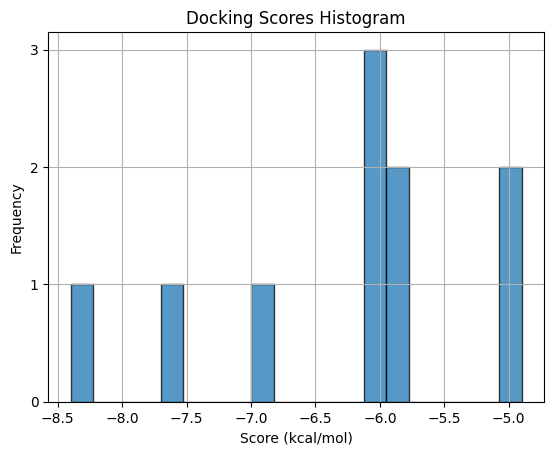

Histogram saved to /content/results/docking_scores_histogram.png


In [ ]:
# Step 20: Create a histogram of docking scores
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file
csv_file = '/content/results/docking_results.csv'
df = pd.read_csv(csv_file, index_col=0)

# Display the histogram
plt.figure(figsize=(10, 6))
ax = df.plot(kind='hist', bins=20, alpha=0.75, edgecolor='black', legend=False)
ax.set_title('Docking Scores Histogram')
ax.set_xlabel('Score (kcal/mol)')
ax.set_ylabel('Frequency')
ax.grid(True)

# Add borders
for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Set major ticks for the y-axis to every 1 unit
ax.yaxis.set_major_locator(plt.MultipleLocator(1))

# Save the image
output_image_path = '/content/results/docking_scores_histogram.png'
plt.savefig(output_image_path)

# Show the graph
plt.show()

print(f"Histogram saved to {output_image_path}")
